In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [142]:
Orders = pd.read_csv('./data/Orders.csv')
m = Orders.shape[0]

In [143]:
Orders.columns

Index(['Row.ID', 'Order.ID', 'Order.Date', 'Ship.Date', 'Ship.Mode',
       'Customer.ID', 'Customer.Name', 'Segment', 'Postal.Code', 'City',
       'State', 'Country', 'Region', 'Market', 'Product.ID', 'Category',
       'Sub.Category', 'Product.Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping.Cost', 'Order.Priority'],
      dtype='object')

In [144]:
Orders.head()

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority
0,40098,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,$221.98,2,0.0,$62.15,40.77,High
1,26341,IN-2014-JR162107-41675,2/5/14,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black","$3,709.40",9,0.1,-$288.77,923.63,Critical
2,25330,IN-2014-CR127307-41929,10/17/14,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID","$5,175.17",9,0.1,$919.97,915.49,Medium
3,13524,ES-2014-KM1637548-41667,1/28/14,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless","$2,892.51",5,0.1,-$96.54,910.16,Medium
4,47221,SG-2014-RH9495111-41948,11/5/14,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed","$2,832.96",8,0.0,$311.52,903.04,Critical


## 1. Data Import and Cleaning

In [145]:
Orders['Sales'].head(15)

0       $221.98
1     $3,709.40
2     $5,175.17
3     $2,892.51
4     $2,832.96
5     $2,862.68
6     $1,822.08
7     $5,244.84
8       $341.96
9        $48.71
10       $17.94
11    $4,626.15
12    $2,616.96
13    $2,221.80
14    $3,701.52
Name: Sales, dtype: object

In [146]:
Orders['Profit'].head(15)

0        $62.15
1      -$288.77
2       $919.97
3       -$96.54
4       $311.52
5       $763.28
6       $564.84
7       $996.48
8        $54.71
9         $5.48
10        $4.66
11      $647.55
12    $1,151.40
13      $622.02
14    $1,036.08
Name: Profit, dtype: object

In [147]:
def remove_dollar(x):
    y = x.replace(",", "")
    return float(y.replace("$", ""))
    
    #if x[0] == '-':
    #    return -float(x[2:].replace(",", ""))
    #else:
    #    return float(x[1:].replace(",", ""))

Orders['Sales'] = Orders['Sales'].apply(lambda x: remove_dollar(x))

In [148]:
Orders['Sales']

0         221.98
1        3709.40
2        5175.17
3        2892.51
4        2832.96
5        2862.68
6        1822.08
7        5244.84
8         341.96
9          48.71
10         17.94
11       4626.15
12       2616.96
13       2221.80
14       3701.52
15       1869.59
16         12.62
17       7958.58
18       2565.59
19       3409.74
20       1977.72
21        242.94
22       2754.00
23       5273.70
24       1713.84
25       2106.50
26       1715.16
27       3069.74
28        247.84
29       1878.72
          ...   
51260       0.44
51261     823.96
51262     213.48
51263      36.48
51264      47.14
51265     259.96
51266      49.30
51267      61.44
51268       5.34
51269     200.40
51270      17.88
51271      71.12
51272      19.32
51273       5.92
51274      41.64
51275       9.61
51276      22.72
51277      34.13
51278      52.59
51279       5.36
51280      15.98
51281      84.00
51282      58.05
51283      26.94
51284      18.64
51285      65.10
51286      16.72
51287       8.

In [129]:
Orders['Sales'].apply(lambda x: remove_dollar(x)).head(10)

0     221.98
1    3709.40
2    5175.17
3    2892.51
4    2832.96
5    2862.68
6    1822.08
7    5244.84
8     341.96
9      48.71
Name: Sales, dtype: float64

In [149]:
Orders['Profit'] = Orders['Profit'].apply(lambda x: remove_dollar(x))

In [150]:
Orders[['Sales','Profit']].head(10)

,Sales,Profit
0,221.98,62.15
1,3709.40,-288.77
2,5175.17,919.97
3,2892.51,-96.54
4,2832.96,311.52
5,2862.68,763.28
6,1822.08,564.84
7,5244.84,996.48
8,341.96,54.71
9,48.71,5.48


In [151]:
type(Orders['Sales'].loc[0])

numpy.float64

## 2. Inventory Management

In [152]:
Orders.columns

Index(['Row.ID', 'Order.ID', 'Order.Date', 'Ship.Date', 'Ship.Mode',
       'Customer.ID', 'Customer.Name', 'Segment', 'Postal.Code', 'City',
       'State', 'Country', 'Region', 'Market', 'Product.ID', 'Category',
       'Sub.Category', 'Product.Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping.Cost', 'Order.Priority'],
      dtype='object')

In [153]:
Orders['Order.Date'].head()

0    11/11/14
1      2/5/14
2    10/17/14
3     1/28/14
4     11/5/14
Name: Order.Date, dtype: object

In [154]:
Orders['Order.Date'] = pd.to_datetime(Orders['Order.Date'])

In [155]:
Orders.shape

(51290, 24)

In [156]:
Orders['Order.Date'][0].month

11

In [157]:
def get_date_month(x):
    return str(x.year) + '-' + str(x.month)

Orders['date_month'] = Orders['Order.Date'].apply(lambda x: get_date_month(x))
Orders['date_month'] = pd.to_datetime(Orders['date_month'])
Orders[['Order.Date','date_month']].head()

,Order.Date,date_month
0,2014-11-11,2014-11-01
1,2014-02-05,2014-02-01
2,2014-10-17,2014-10-01
3,2014-01-28,2014-01-01
4,2014-11-05,2014-11-01


In [160]:
def get_date_year(x):
    return str(x.year) 

Orders['date_year'] = Orders['Order.Date'].apply(lambda x: get_date_year(x))
Orders['date_year'] = pd.to_datetime(Orders['date_year'])
Orders[['Order.Date','date_year']].head()

,Order.Date,date_year
0,2014-11-11,2014-01-01
1,2014-02-05,2014-01-01
2,2014-10-17,2014-01-01
3,2014-01-28,2014-01-01
4,2014-11-05,2014-01-01


### - Sales

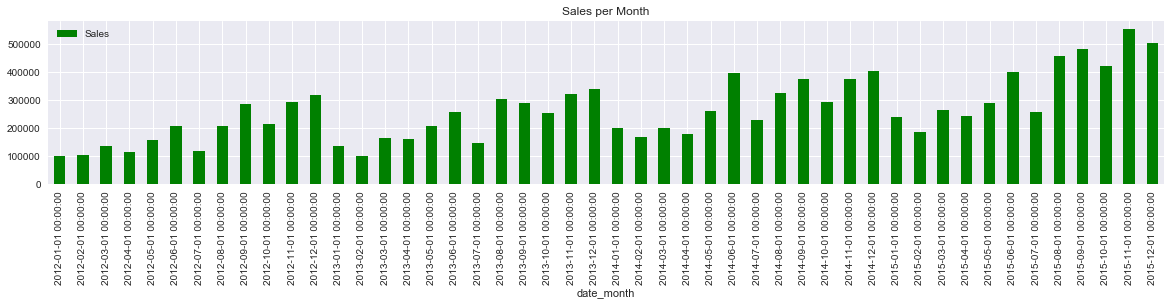

In [168]:
plt.rcParams["figure.figsize"] = (20,3)
group_month_sales = Orders[['date_month','Sales']].groupby(['date_month'])
group_month_sales.sum().plot(kind='bar', color='green', title = 'Sales per Month');

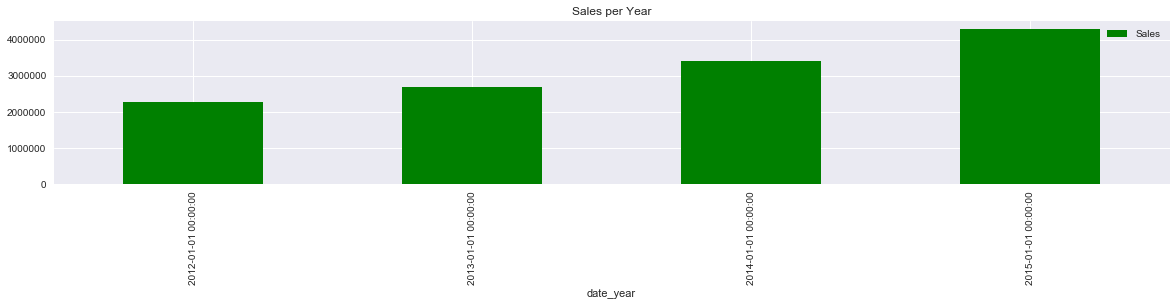

In [167]:
plt.rcParams["figure.figsize"] = (20,3)
group_year_sales = Orders[['date_year','Sales']].groupby(['date_year'])
group_year_sales.sum().plot(kind='bar', color='green', title = 'Sales per Year');

### - Quantity

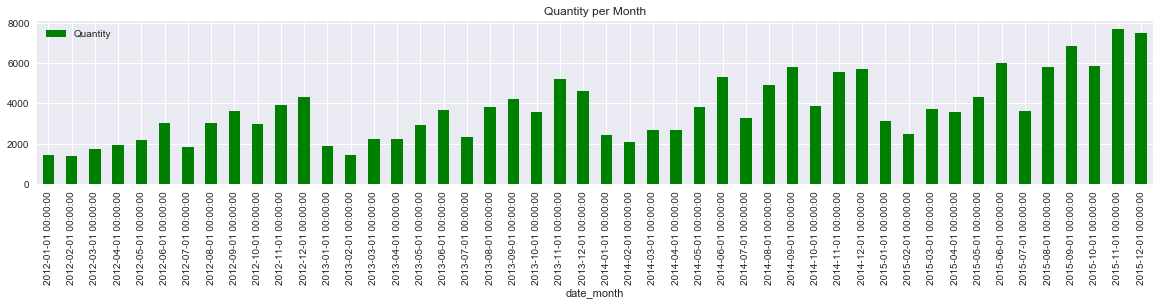

In [165]:
plt.rcParams["figure.figsize"] = (20,3)
group_month_quantity = Orders[['date_month','Quantity']].groupby(['date_month'])
group_month_quantity.sum().plot(kind='bar', color='green', title = 'Quantity per Month');

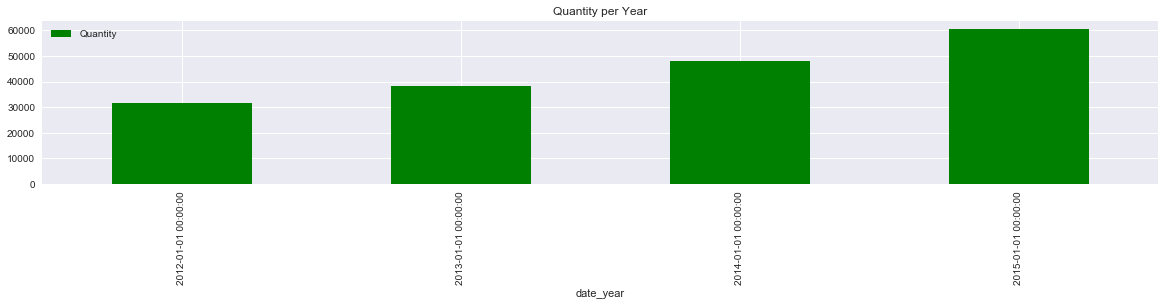

In [166]:
plt.rcParams["figure.figsize"] = (20,3)
group_year_quantity = Orders[['date_year','Quantity']].groupby(['date_year'])
group_year_quantity.sum().plot(kind='bar', color='green', title = 'Quantity per Year');

In [173]:
Orders.groupby(['Category']).count()

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,date_month,date_year
Category,,,,,,,,,,,,,,,,,,,,,
Furniture,9860,9860,9860,9860,9860,9860,9860,9860,2105,9860,...,9860,9860,9860,9860,9860,9860,9860,9860,9860,9860
Office Supplies,31289,31289,31289,31289,31289,31289,31289,31289,6042,31289,...,31289,31289,31289,31289,31289,31289,31289,31289,31289,31289
Technology,10141,10141,10141,10141,10141,10141,10141,10141,1847,10141,...,10141,10141,10141,10141,10141,10141,10141,10141,10141,10141


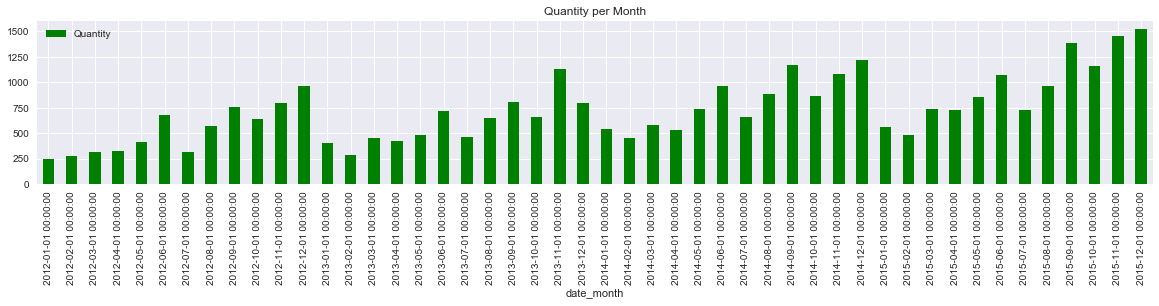

In [174]:
plt.rcParams["figure.figsize"] = (20,3)
group_month_quantity_furniture = Orders[Orders['Category']=='Furniture'][['date_month','Quantity']].groupby(['date_month'])
group_month_quantity_furniture.sum().plot(kind='bar', color='green', title = 'Quantity per Month');

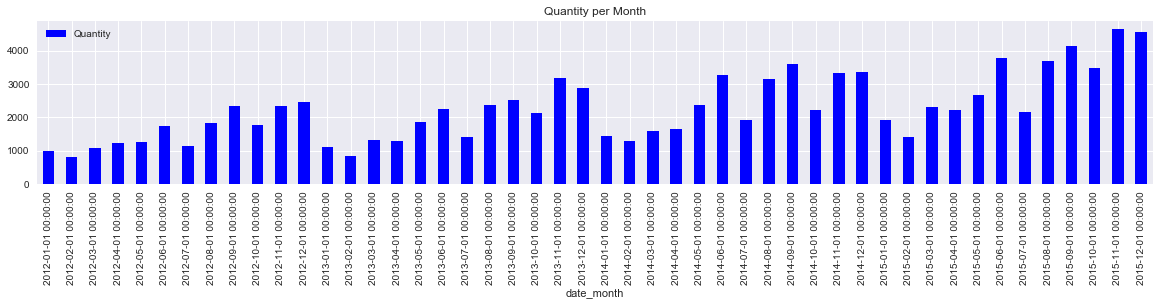

In [175]:
plt.rcParams["figure.figsize"] = (20,3)
group_month_quantity_furniture = Orders[Orders['Category']=='Office Supplies'][['date_month','Quantity']].groupby(['date_month'])
group_month_quantity_furniture.sum().plot(kind='bar', color='blue', title = 'Quantity per Month');

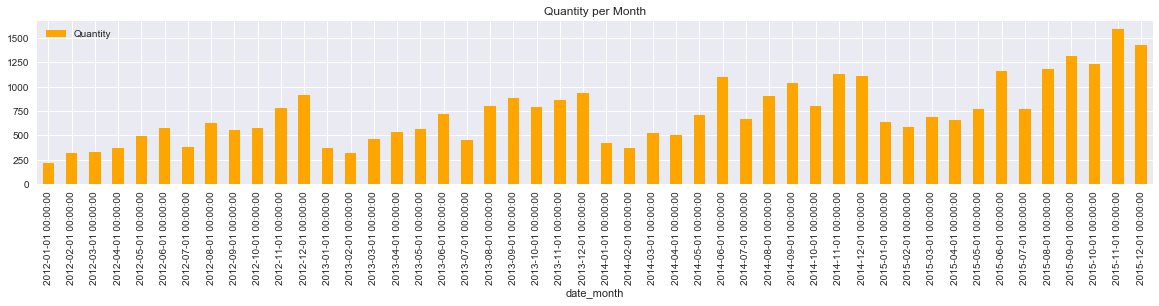

In [176]:
plt.rcParams["figure.figsize"] = (20,3)
group_month_quantity_furniture = Orders[Orders['Category']=='Technology'][['date_month','Quantity']].groupby(['date_month'])
group_month_quantity_furniture.sum().plot(kind='bar', color='orange', title = 'Quantity per Month');

### 3. Why did customers make returns?

In [178]:
Orders.columns

Index(['Row.ID', 'Order.ID', 'Order.Date', 'Ship.Date', 'Ship.Mode',
       'Customer.ID', 'Customer.Name', 'Segment', 'Postal.Code', 'City',
       'State', 'Country', 'Region', 'Market', 'Product.ID', 'Category',
       'Sub.Category', 'Product.Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping.Cost', 'Order.Priority', 'date_month', 'date_year'],
      dtype='object')

In [183]:
Orders['Sales']

0         221.98
1        3709.40
2        5175.17
3        2892.51
4        2832.96
5        2862.68
6        1822.08
7        5244.84
8         341.96
9          48.71
10         17.94
11       4626.15
12       2616.96
13       2221.80
14       3701.52
15       1869.59
16         12.62
17       7958.58
18       2565.59
19       3409.74
20       1977.72
21        242.94
22       2754.00
23       5273.70
24       1713.84
25       2106.50
26       1715.16
27       3069.74
28        247.84
29       1878.72
          ...   
51260       0.44
51261     823.96
51262     213.48
51263      36.48
51264      47.14
51265     259.96
51266      49.30
51267      61.44
51268       5.34
51269     200.40
51270      17.88
51271      71.12
51272      19.32
51273       5.92
51274      41.64
51275       9.61
51276      22.72
51277      34.13
51278      52.59
51279       5.36
51280      15.98
51281      84.00
51282      58.05
51283      26.94
51284      18.64
51285      65.10
51286      16.72
51287       8.